In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

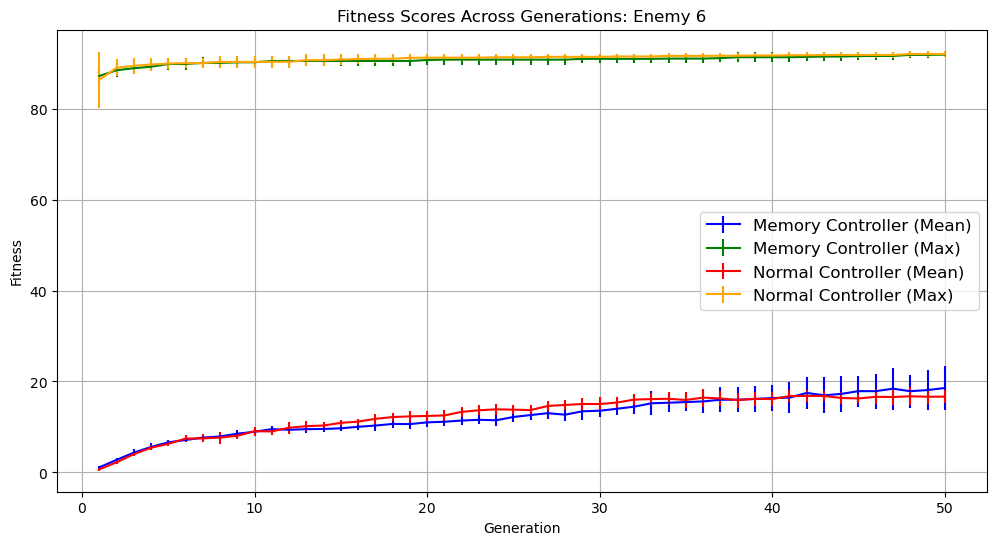

In [2]:
# Directory where the CSV files are located
data_dir = './'  # Replace with the actual directory path

# Initialize lists to store data
mean_fitness_memory = []
max_fitness_memory = []
mean_fitness_normal = []
max_fitness_normal = []

# Loop through the CSV files (run_0.csv to run_9.csv)
for run_number in range(10):
    memory_file_path = os.path.join(data_dir, 'memory_controller', f'run_{run_number}.csv')
    normal_file_path = os.path.join(data_dir, 'normal_controller', f'run_{run_number}.csv')

    # Read the CSV files into DataFrames
    df_memory = pd.read_csv(memory_file_path)
    df_normal = pd.read_csv(normal_file_path)

    # Extract the 'mean_fitness' and 'max_fitness' columns
    mean_fitness_memory.append(df_memory['mean_fitness'])
    max_fitness_memory.append(df_memory['max_fitness'])
    mean_fitness_normal.append(df_normal['mean_fitness'])
    max_fitness_normal.append(df_normal['max_fitness'])

# Calculate the average and standard deviation for each generation
mean_fitness_memory_avg = pd.concat(mean_fitness_memory, axis=1).mean(axis=1)
mean_fitness_memory_std = pd.concat(mean_fitness_memory, axis=1).std(axis=1)
max_fitness_memory_avg = pd.concat(max_fitness_memory, axis=1).mean(axis=1)
max_fitness_memory_std = pd.concat(max_fitness_memory, axis=1).std(axis=1)

mean_fitness_normal_avg = pd.concat(mean_fitness_normal, axis=1).mean(axis=1)
mean_fitness_normal_std = pd.concat(mean_fitness_normal, axis=1).std(axis=1)
max_fitness_normal_avg = pd.concat(max_fitness_normal, axis=1).mean(axis=1)
max_fitness_normal_std = pd.concat(max_fitness_normal, axis=1).std(axis=1)

# Create a line plot for mean fitness and max fitness
plt.figure(figsize=(12, 6))

# Memory Controller - Mean Fitness
plt.errorbar(range(1, len(mean_fitness_memory_avg) + 1), mean_fitness_memory_avg, yerr=mean_fitness_memory_std, label='Memory Controller (Mean)', color='blue')

# Memory Controller - Max Fitness
plt.errorbar(range(1, len(max_fitness_memory_avg) + 1), max_fitness_memory_avg, yerr=max_fitness_memory_std, label='Memory Controller (Max)', color='green')

# Normal Controller - Mean Fitness
plt.errorbar(range(1, len(mean_fitness_normal_avg) + 1), mean_fitness_normal_avg, yerr=mean_fitness_normal_std, label='Normal Controller (Mean)', color='red')

# Normal Controller - Max Fitness
plt.errorbar(range(1, len(max_fitness_normal_avg) + 1), max_fitness_normal_avg, yerr=max_fitness_normal_std, label='Normal Controller (Max)', color='orange')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Scores Across Generations: Enemy 6')
plt.legend(fontsize = 'large')
plt.grid(True)

# Show the plot
plt.show()
